In [2]:
from sklearn.datasets import load_iris
import pandas as pd
# 1. Loading and Preprocessing the Iris Dataset
# Load the Iris dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#species information is stored in the target,which we do not incluxe. So, no need to drop it.

In [6]:
# 2. Clustering Algorithm Implementation
# A) KMeans Clustering
# Description of KMeans:
# KMeans is a partition-based clustering algorithm that groups data into k clusters by minimizing the within-cluster variance.
# It works iteratively to assign each data point to one of k clusters based on the nearest centroid and then recalculates the centroids.

# Why KMeans is suitable for the Iris dataset:
# The Iris dataset has continuous numerical features, and KMeans works well with such data when clusters are compact and spherical.



from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(iris_scaled)

# Add cluster labels to the dataframe
iris_df['KMeans_Cluster'] = kmeans_labels

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


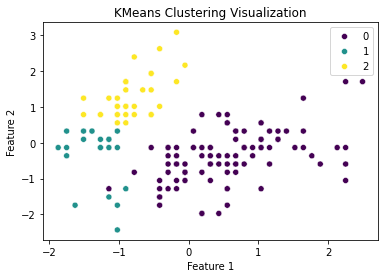

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualize the KMeans clusters
sns.scatterplot(x=iris_scaled[:, 0], y=iris_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

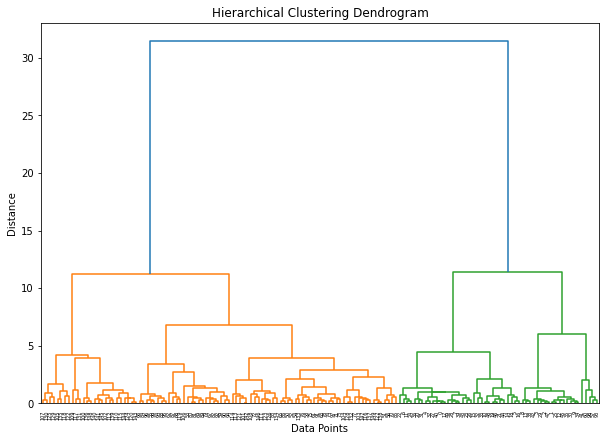

In [8]:
# B) Hierarchical Clustering
# Description of Hierarchical Clustering:
# Hierarchical clustering creates a tree (dendrogram) representing nested clusters.
# Agglomerative clustering starts with each data point as its cluster, progressively merging the closest clusters.

# Why Hierarchical clustering is suitable for the Iris dataset:
# The dendrogram provides a visual representation of the data's clustering structure, which helps determine the number of clusters.

from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(iris_scaled, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

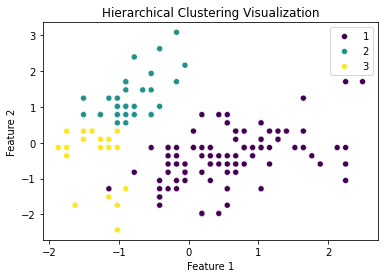

In [9]:
# Cutting the dendrogram to form clusters
from scipy.cluster.hierarchy import fcluster
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Add cluster labels to the dataframe
iris_df['Hierarchical_Cluster'] = hierarchical_labels

# Visualize the Hierarchical clusters
sns.scatterplot(x=iris_scaled[:, 0], y=iris_scaled[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()